## Cyclistic : How Does a Bike-Share Navigate Speedy Success?

## INTRODUCTION
 In order to complete my Google Data Analytics certification plan, I was presented with a case study that I need to complete. The case study topic is "How does a bike-share navigate speedy success?". I will be following the steps of the data analysis process: **ask, prepare, process, analyze, share, and act**. 

## ASK 

### What is the topic of this Case Study?
This Case Study will entail how casual riders and annual members use cyclist bikes differently.

### What is the problem you are trying to solve?
The problem in this case study is to discover how annual members and casual riders use Cyclistic bikes differently. The result of this will be used to design a marketing strategies aimed at converting casual riders into annual members. The director of marketing (Lily Moreno) believes that’s the key to future growth.

#### Business task: 
How do annual members and casual riders use Cyclistic bikes differently?

### Who are the key stakeholder?
#### Stakeholders are: 
* Company: Cyclistic with 5,800 bicycles and 600 docking stations
* Lily Moreno- The director of marketing and manager cyclistic executive team

#### Business Metrics used to measure the data in this Case Study:
* Most used bikes between classic bikes, docked bikes, and electric bikes
* The most trip time
* 7 days bike usage
* 12 month bike usage

## PREPARE

### Where is your data located?
The data is located in [Amazon Web Server (AWS)](https://divvy-tripdata.s3.amazonaws.com/index.html) which is owned by Cyclistic company. It is first-party data.

### How is the data organized?
The data is stored as CSV file and are separated by month and year. There are columns like rider_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, stat_lat, stat_lng, end_lat, end_lng and member_casual in all the dataset.

### Are there issues with bias or credibility in this data? Does your data ROCCC?
There are missing values in station name and ID column which is not needed in this analysis, aside that I can confirm that the data meets the ROCCC requirements which makes it a good data source. ROCCC means; Reliability, Original, Comprehensive, Current, Cited.

### How are you addressing licensing, privacy, security, and accessibility?
The data has been made available by Motivate International Inc and [licensed.](https://divvybikes.com/data-license-agreement) The data downloaded will be stored in my computer drive and google drive. The raw data of this case study will be inaccessible to the public, but the result of the processed data will be represented in tables, tibbles, and visualization.

### How did you verify the data’s integrity?
There are some missing values in the station names and ID column but the presence of longitude and latitude coordinates values shows that the data can be identified geographically. Though this won't be needed in this analysis.

## PROCESS

In this phase of the analysis, i will be using R programming language to process my data. I will install and load all the necessary packages in RStudio. There are 12 datasets to be used in this analysis and it will be imported into RStudio for the analysis, then compare the columns in each dataset to ensure consistency. The 12 datasets will be combined into one single dataset. The dataset will be cleaned by removing bad data like emmty rows, empty columns, negative values, NA values. Columns that are not needed in this analysis will also be removed. Additional columns like day, month, year, day_of_week and ride_length will be added to the data table to better aggregate the data for analysis.

### installing packages

* install.packages("tidyverse")
* install.packages("skimr")
* install.packages("janitor")
* install.packages("ggplot2")
* install.packages("lubridate")

In [1]:
# loading packages

library(tidyverse)
library(skimr)
library(readr)
library(hms) 
library(lubridate)
library(ggplot2)
library(dplyr)
library(janitor)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following object is masked from ‘package:hms’:

    hms


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# importing dataset

tripdata_aug21 <- read.csv("../input/cyclistic-trip-data/202108-divvy-tripdata.csv")
tripdata_sep21 <- read.csv("../input/cyclistic-trip-data/202109-divvy-tripdata.csv")
tripdata_oct21 <- read.csv("../input/cyclistic-trip-data/202110-divvy-tripdata.csv")
tripdata_nov21 <- read.csv("../input/cyclistic-trip-data/202111-divvy-tripdata.csv")
tripdata_dec21 <- read.csv("../input/cyclistic-trip-data/202112-divvy-tripdata.csv")
tripdata_jan22 <- read.csv("../input/cyclistic-trip-data/202201-divvy-tripdata.csv")
tripdata_feb22 <- read.csv("../input/cyclistic-trip-data/202202-divvy-tripdata.csv")
tripdata_mar22 <- read.csv("../input/cyclistic-trip-data/202203-divvy-tripdata.csv")
tripdata_apr22 <- read.csv("../input/cyclistic-trip-data/202204-divvy-tripdata.csv")
tripdata_may22 <- read.csv("../input/cyclistic-trip-data/202205-divvy-tripdata.csv")
tripdata_jun22 <- read.csv("../input/cyclistic-trip-data/202206-divvy-tripdata.csv")
tripdata_jul22 <- read.csv("../input/cyclistic-trip-data/202207-divvy-tripdata.csv")

# compare the column names of each dataset

colnames(tripdata_aug21)
colnames(tripdata_sep21)
colnames(tripdata_oct21)
colnames(tripdata_nov21)
colnames(tripdata_dec21)
colnames(tripdata_jan22)
colnames(tripdata_feb22)
colnames(tripdata_mar22)
colnames(tripdata_apr22)
colnames(tripdata_may22)
colnames(tripdata_jun22)
colnames(tripdata_jul22)


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [3]:
# compare all the columns in each dataframe to ensure consistency

compare_df_cols(tripdata_aug21, tripdata_sep21, tripdata_oct21, tripdata_nov21, tripdata_dec21, tripdata_jan22, tripdata_feb22, tripdata_mar22, tripdata_apr22, tripdata_may22, tripdata_jun22,tripdata_jul22)

column_name,tripdata_aug21,tripdata_sep21,tripdata_oct21,tripdata_nov21,tripdata_dec21,tripdata_jan22,tripdata_feb22,tripdata_mar22,tripdata_apr22,tripdata_may22,tripdata_jun22,tripdata_jul22
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,character,character,character,character,character,character,character,character,character,character,character,character
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [4]:
# combine all the data frames into one

total_trips <- rbind(tripdata_aug21, tripdata_sep21, tripdata_oct21, tripdata_nov21, tripdata_dec21, tripdata_jan22, tripdata_feb22, tripdata_mar22, tripdata_apr22, tripdata_may22, tripdata_jun22,tripdata_jul22)

# check the data frame structure

str(total_trips)

# convert started_at and ended_at from character type to POSIXct type

total_trips$started_at <- as.POSIXct(total_trips$started_at, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")
total_trips$ended_at <- as.POSIXct(total_trips$ended_at, format = "%Y-%m-%d %H:%M:%S", tz = "UTC")

# the dataset consist of empty rows and NA values so they need to be removed
total_trips <- na.omit(total_trips)

# there are columns with incomplete data and are not needed in the analysis, so i want to drop them and setting new table as total_trips2

drops <- c('start_station_name', 'start_station_id', 'end_station_name', 'end_station_id')
total_trips2 = total_trips[ , !(names(total_trips) %in% drops)]

# reviewing the new table

colnames(total_trips2)
dim(total_trips2)
nrow(total_trips2)
str(total_trips2)

# add columns like day, month, year, and days of the week 

total_trips2$date <- as.Date(total_trips2$started_at) #format yyyy-mm-dd
total_trips2$month <- format(as.Date(total_trips2$date), "%m")
total_trips2$day <- format(as.Date(total_trips2$date), "%d")
total_trips2$year <- format(as.Date(total_trips2$date), "%Y")
total_trips2$day_of_week <- format(as.Date(total_trips2$date), "%A")

# adding another colomn like ride_length

total_trips2$ride_length <- difftime(total_trips2$ended_at, total_trips2$started_at)

'data.frame':	5901463 obs. of  13 variables:
 $ ride_id           : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-08-10 17:15:49" "2021-08-10 17:23:14" "2021-08-21 02:34:23" "2021-08-21 06:52:55" ...
 $ ended_at          : chr  "2021-08-10 17:22:44" "2021-08-10 17:39:24" "2021-08-21 02:50:36" "2021-08-21 07:08:13" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 42 42 41.8 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.8 41.8 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


[1] "ride_id"       "rideable_type" "started_at"    "ended_at"     
[5] "start_lat"     "start_lng"     "end_lat"       "end_lng"      
[9] "member_casual"

[1] 5895873       9

[1] 5895873

'data.frame':	5895873 obs. of  9 variables:
 $ ride_id      : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : POSIXct, format: "2021-08-10 17:15:49" "2021-08-10 17:23:14" ...
 $ ended_at     : POSIXct, format: "2021-08-10 17:22:44" "2021-08-10 17:39:24" ...
 $ start_lat    : num  41.8 41.8 42 42 41.8 ...
 $ start_lng    : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat      : num  41.8 41.8 42 42 41.8 ...
 $ end_lng      : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual: chr  "member" "member" "member" "member" ...


In [5]:
# review the table with added columns

colnames(total_trips2)
str(total_trips2)

[1] "ride_id"       "rideable_type" "started_at"    "ended_at"     
 [5] "start_lat"     "start_lng"     "end_lat"       "end_lng"      
 [9] "member_casual" "date"          "month"         "day"          
[13] "year"          "day_of_week"   "ride_length"

'data.frame':	5895873 obs. of  15 variables:
 $ ride_id      : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : POSIXct, format: "2021-08-10 17:15:49" "2021-08-10 17:23:14" ...
 $ ended_at     : POSIXct, format: "2021-08-10 17:22:44" "2021-08-10 17:39:24" ...
 $ start_lat    : num  41.8 41.8 42 42 41.8 ...
 $ start_lng    : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat      : num  41.8 41.8 42 42 41.8 ...
 $ end_lng      : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual: chr  "member" "member" "member" "member" ...
 $ date         : Date, format: "2021-08-10" "2021-08-10" ...
 $ month        : chr  "08" "08" "08" "08" ...
 $ day          : chr  "10" "10" "21" "21" ...
 $ year         : chr  "2021" "2021" "2021" "2021" ...
 $ day_of_week  : chr  "Tuesday" "Tuesday" "Saturday" "Saturday" ...
 $ ride_length  : 'difftime' num  415 970 

In [6]:
# checking the dataframe for negative entry in ride_length column
nrow(total_trips2[(total_trips2$ride_length<0),])

# creating new table (new_total_trips2) without the  negative values and inspect the new table that has been created

new_total_trips2 <- total_trips2[!(total_trips2$ride_length<0),]
dim(new_total_trips2)
colnames(new_total_trips2)
nrow(new_total_trips2)
head(new_total_trips2)
str(new_total_trips2)
summary(new_total_trips2)

# convert ride_length to numeric 
new_total_trips2$ride_length <- as.numeric(as.character(new_total_trips2$ride_length))

# Check if ride_length is numeric
is.numeric(new_total_trips2$ride_length)

# check columns casual_members and rideable_type

unique(new_total_trips2["member_casual"])
unique(new_total_trips2["rideable_type"])


[1] 149

[1] 5895724      15

[1] "ride_id"       "rideable_type" "started_at"    "ended_at"     
 [5] "start_lat"     "start_lng"     "end_lat"       "end_lng"      
 [9] "member_casual" "date"          "month"         "day"          
[13] "year"          "day_of_week"   "ride_length"

[1] 5895724

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
1,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,41.77,-87.68,41.77,-87.68,member,2021-08-10,08,10,2021,Tuesday,415 secs
2,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,41.77,-87.68,41.77,-87.63,member,2021-08-10,08,10,2021,Tuesday,970 secs
3,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,41.95,-87.65,41.97,-87.66,member,2021-08-21,08,21,2021,Saturday,973 secs
4,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,41.97,-87.67,41.95,-87.65,member,2021-08-21,08,21,2021,Saturday,918 secs
5,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,41.79,-87.60,41.77,-87.62,member,2021-08-19,08,19,2021,Thursday,522 secs
6,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,41.81,-87.61,41.80,-87.60,member,2021-08-19,08,19,2021,Thursday,395 secs


'data.frame':	5895724 obs. of  15 variables:
 $ ride_id      : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : POSIXct, format: "2021-08-10 17:15:49" "2021-08-10 17:23:14" ...
 $ ended_at     : POSIXct, format: "2021-08-10 17:22:44" "2021-08-10 17:39:24" ...
 $ start_lat    : num  41.8 41.8 42 42 41.8 ...
 $ start_lng    : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat      : num  41.8 41.8 42 42 41.8 ...
 $ end_lng      : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual: chr  "member" "member" "member" "member" ...
 $ date         : Date, format: "2021-08-10" "2021-08-10" ...
 $ month        : chr  "08" "08" "08" "08" ...
 $ day          : chr  "10" "10" "21" "21" ...
 $ year         : chr  "2021" "2021" "2021" "2021" ...
 $ day_of_week  : chr  "Tuesday" "Tuesday" "Saturday" "Saturday" ...
 $ ride_length  : 'difftime' num  415 970 

   ride_id          rideable_type        started_at                 
 Length:5895724     Length:5895724     Min.   :2021-08-01 00:00:04  
 Class :character   Class :character   1st Qu.:2021-09-27 12:28:09  
 Mode  :character   Mode  :character   Median :2022-02-14 11:53:23  
                                       Mean   :2022-01-31 21:19:16  
                                       3rd Qu.:2022-06-05 15:18:32  
                                       Max.   :2022-07-31 23:59:58  
    ended_at                     start_lat       start_lng         end_lat     
 Min.   :2021-08-01 00:03:11   Min.   :41.64   Min.   :-87.84   Min.   :41.39  
 1st Qu.:2021-09-27 12:47:44   1st Qu.:41.88   1st Qu.:-87.66   1st Qu.:41.88  
 Median :2022-02-14 12:06:38   Median :41.90   Median :-87.64   Median :41.90  
 Mean   :2022-01-31 21:37:05   Mean   :41.90   Mean   :-87.65   Mean   :41.90  
 3rd Qu.:2022-06-05 15:43:31   3rd Qu.:41.93   3rd Qu.:-87.63   3rd Qu.:41.93  
 Max.   :2022-08-01 13:26:03   Max.  

[1] TRUE

,member_casual
,<chr>
1,member
71,casual


,rideable_type
,<chr>
1,electric_bike
31,classic_bike
8168,docked_bike


## ANALYZE

The data has been cleaned and ready to perform analysis on it. In this phase i will be organizing, aggregating and performing calsulations to identify the trends and relationships in the data.

In [7]:
# compare the number to members vs casual riders
view(new_total_trips2$member_casual)
summary(new_total_trips2$ride_length)

# discriptive analysis
# decriptive analysis on ride_length (seconds)

mean(new_total_trips2$ride_length) 
median(new_total_trips2$ride_length) 
max(new_total_trips2$ride_length)
min(new_total_trips2$ride_length)
mode(new_total_trips2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     370     657    1068    1186 2497750 

[1] 1068.424

[1] 657

[1] 2497750

[1] 0

[1] "numeric"

In [8]:
# calculating the mean and max of ride lenght

aggregate(new_total_trips2$ride_length ~ new_total_trips2$member_casual, FUN = mean)
aggregate(new_total_trips2$ride_length ~ new_total_trips2$member_casual, FUN = max)

new_total_trips2$member_casual,new_total_trips2$ride_length
<chr>,<dbl>
casual,1481.9572
member,760.2812


new_total_trips2$member_casual,new_total_trips2$ride_length
<chr>,<dbl>
casual,2497750
member,89996


In [9]:
# compare average riding time per day by membership(casual vs member)
# first reorganize day_of_week accordingly

new_total_trips2$day_of_week <- ordered(new_total_trips2$day_of_week, 
levels=c("Sunday", "Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday"))

# after that i compare average riding time per day

aggregate(new_total_trips2$ride_length ~ new_total_trips2$member_casual + 
            new_total_trips2$day_of_week, FUN = mean)

# grouping total trips by members_casual and day_of_week

new_total_trips2%>%
  group_by(member_casual, day_of_week)%>%
  summarize(number_of_ride = n(), average_duration = mean(ride_length))%>%
  arrange(member_casual, day_of_week)


new_total_trips2$member_casual,new_total_trips2$day_of_week,new_total_trips2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,1719.1204
member,Sunday,856.6393
casual,Monday,1531.2856
member,Monday,738.6934
casual,Tuesday,1291.0836
member,Tuesday,713.8310
casual,Wednesday,1271.7207
member,Wednesday,719.0194
casual,Thursday,1308.3803


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_ride,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,474596,1719.1204
casual,Monday,299079,1531.2856
casual,Tuesday,273307,1291.0836
casual,Wednesday,281327,1271.7207
casual,Thursday,315539,1308.3803
casual,Friday,346999,1373.0453
casual,Saturday,526522,1627.3740
member,Sunday,417823,856.6393
member,Monday,472281,738.6934


## SHARE

This is the phase to create data visualization and share my findings with the help of ggplot2 for data visualization.

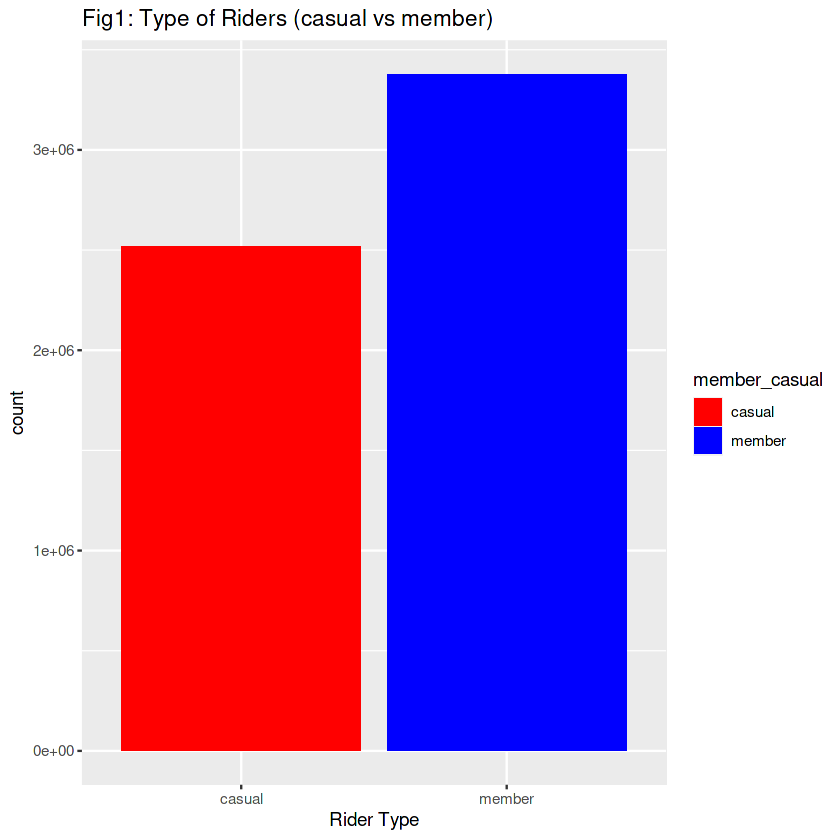

In [10]:
# number of members vs casual riders

ggplot(new_total_trips2, aes(member_casual, fill = member_casual)) + geom_bar() + scale_fill_manual( values = c("red", "blue"))+
  labs(title = "Fig1: Type of Riders (casual vs member)", x = "Rider Type")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


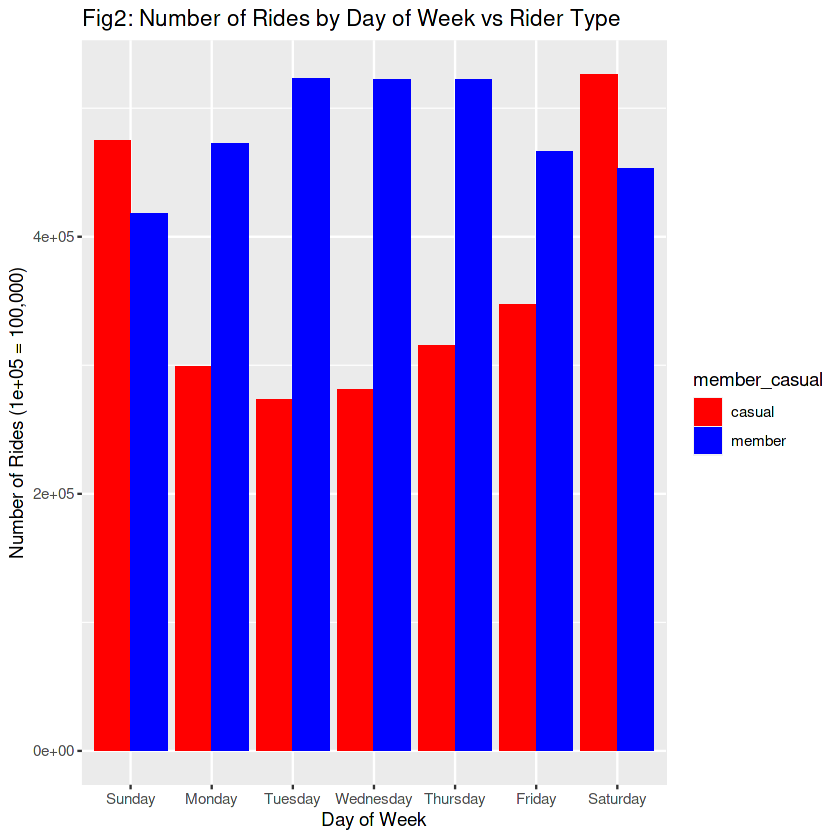

In [11]:
# number_of_ride by day_of_week vs member_casual

new_total_trips2%>%
  group_by(member_casual, day_of_week)%>%
  summarize(number_of_ride = n(), average_duration = mean(ride_length))%>%
  arrange(member_casual, day_of_week)%>%
  ggplot(aes(x = day_of_week, y = number_of_ride, fill = member_casual)) + 
  geom_col(position = "dodge")+scale_fill_manual( values = c("red", "blue"))+
  labs(title="Fig2: Number of Rides by Day of Week vs Rider Type")+
  ylab("Number of Rides (1e+05 = 100,000)") + xlab("Day of Week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


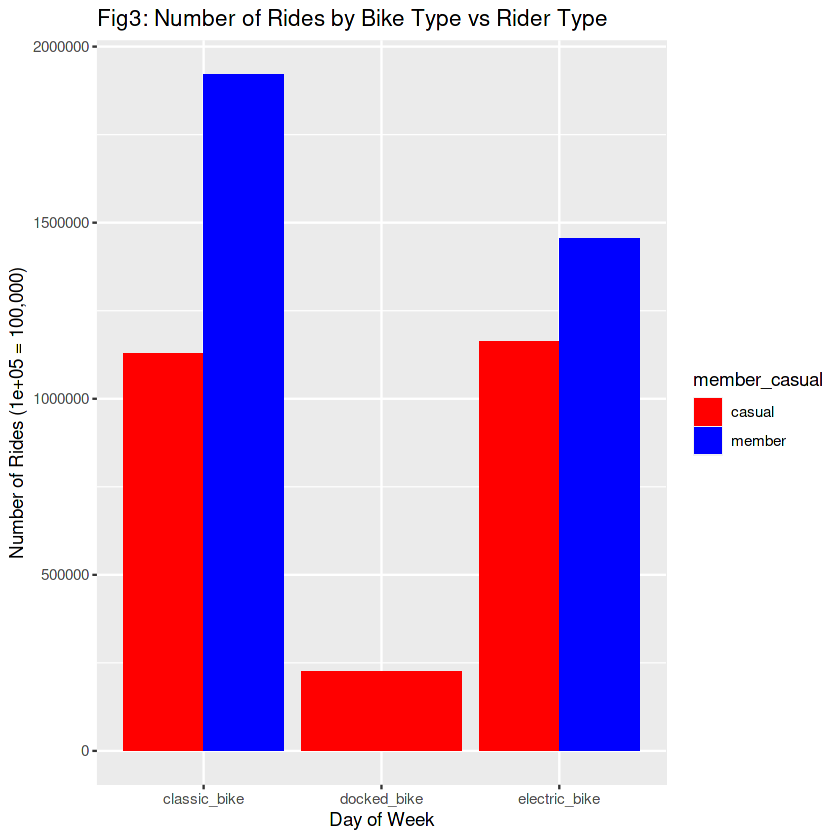

In [12]:
# number_of_ride by rideable_type vs member_casual

new_total_trips2%>%
  group_by(member_casual, rideable_type)%>%
  summarize(number_of_rides = n(), average_duration = mean(ride_length))%>%
  arrange(member_casual, rideable_type)%>%
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) + 
  geom_col(position = "dodge")+scale_fill_manual( values = c("red", "blue"))+
  labs(title="Fig3: Number of Rides by Bike Type vs Rider Type")+
  ylab("Number of Rides (1e+05 = 100,000)") + xlab("Day of Week")

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


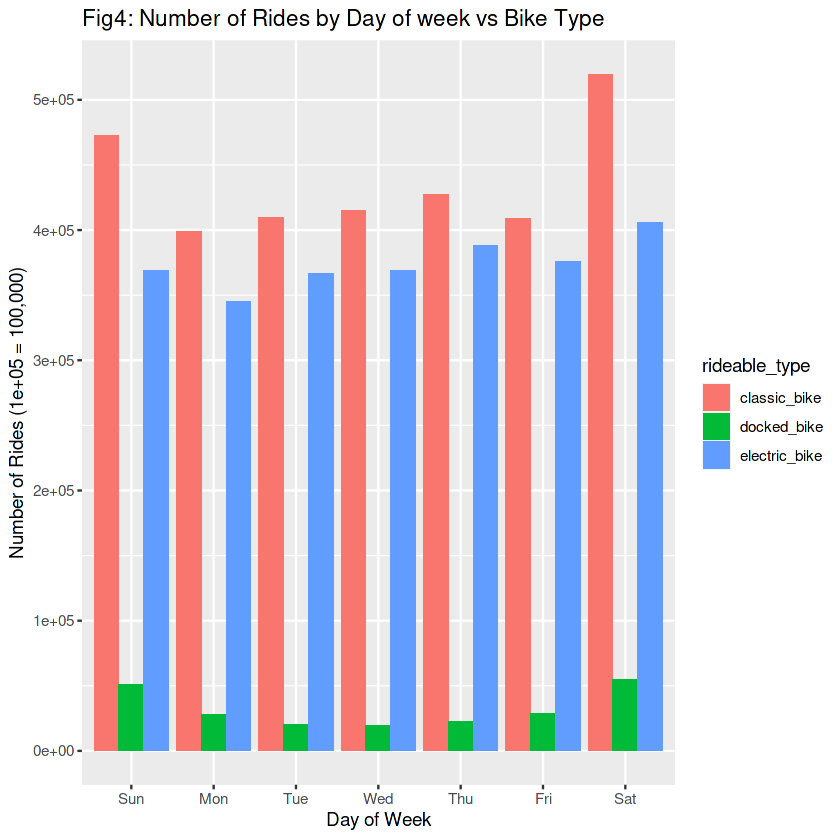

In [13]:
# number_of_ride by day_of_week vs rideable_type

new_total_trips2 %>% 
  mutate(day_of_week = wday(started_at, label = TRUE)) %>% 
  group_by(rideable_type, day_of_week) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(rideable_type, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + 
  labs(title = "Fig4: Number of Rides by Day of week vs Bike Type") + 
  ylab("Number of Rides (1e+05 = 100,000)") + xlab("Day of Week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


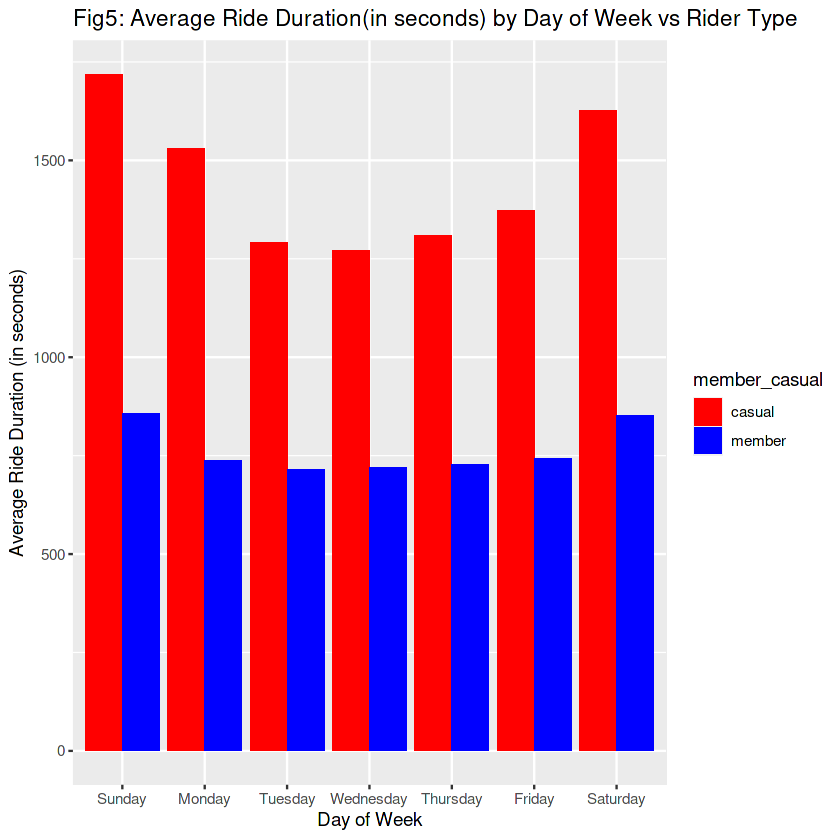

In [14]:
# average duration/ day_of_week vs member_casual

new_total_trips2%>%
  group_by(member_casual, day_of_week)%>%
  summarize(number_of_rides = n(), average_duration  = mean(ride_length))%>%
  arrange(member_casual, day_of_week)%>%
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) + 
  geom_col(position = "dodge")+scale_fill_manual( values = c("red", "blue"))+
  labs(title="Fig5: Average Ride Duration(in seconds) by Day of Week vs Rider Type")+
  ylab("Average Ride Duration (in seconds)") + xlab("Day of Week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


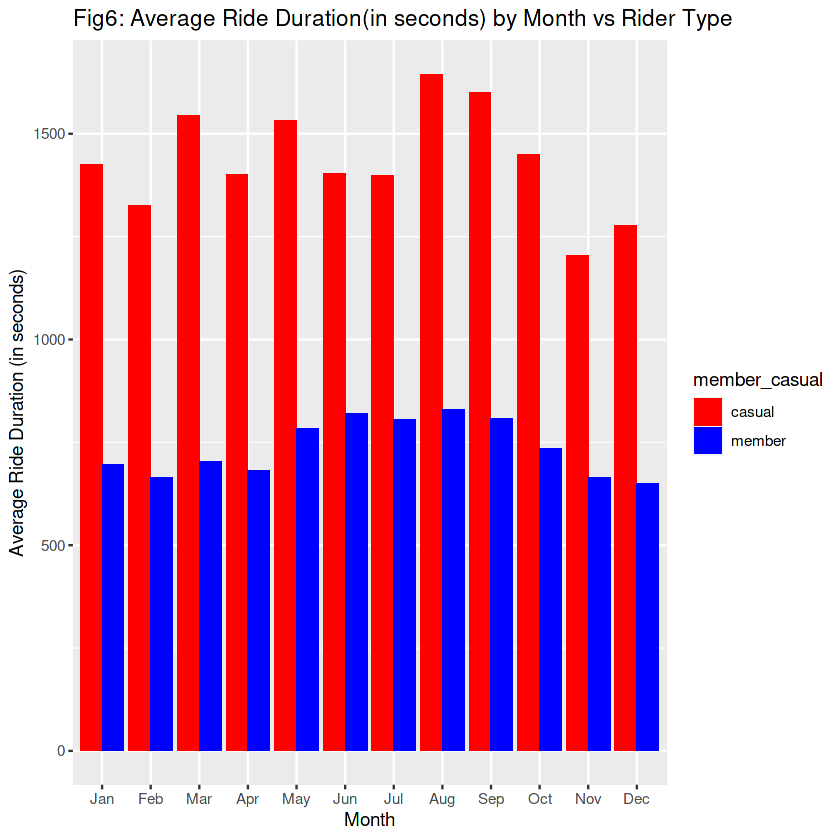

In [15]:
# average duration by month vs member_casual

new_total_trips2 %>% 
  mutate(month=month(started_at, label = TRUE)) %>%
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),average_duration = mean(as.numeric(ride_length))) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +scale_fill_manual( values = c("red", "blue"))+ 
  labs(title="Fig6: Average Ride Duration(in seconds) by Month vs Rider Type")+
  ylab("Average Ride Duration (in seconds)") + xlab("Month")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


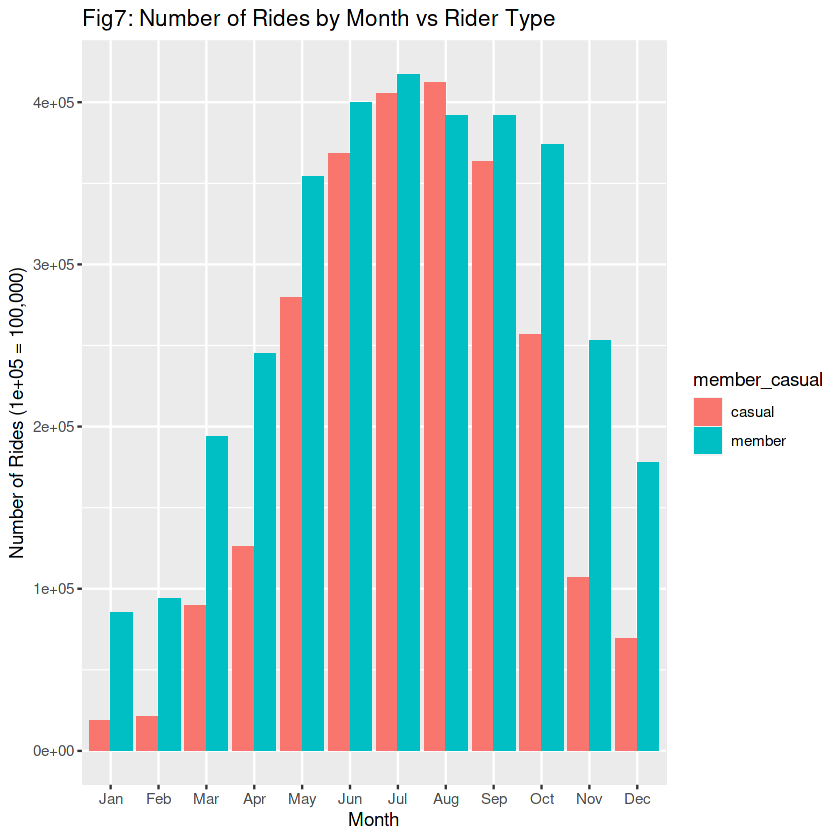

In [16]:
# number_of_ride by month vs member_casual

new_total_trips2 %>% 
  mutate(month=month(started_at, label = TRUE)) %>%
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n() ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + 
  labs(title = "Fig7: Number of Rides by Month vs Rider Type") + 
  ylab("Number of Rides (1e+05 = 100,000)") + xlab("Month")

### SUMMARY 

#### The analysis shows that:
* The company have 57.3% annual member and 42.7% of casual riders.
*  Tuesday, Wednesday, and Thursday are days annual members take their most rides while casual riders take their most rides on Saturday and Sunday.
* The most used bike is classic bike and electric bike. Docked by is only used by casual riders.
* Classic bike, Electric bike and Docked bike are mostly used on weekends (saturday and sunday), but there is a slight drop of electric bike compare to thursday and friday.
* Casual riders and annual members has their most trips time on weekends (Saturday and Sunday).
* The most trip time for casual riders and annual members are in august.
* Annual members takes their most rides in july while casual riders takes their most ride in august.

## ACT

Looking at the visual representation and to achieve the business task considering Fig2 which is the number of rides by days of the week vs rider type, I noticed that annual members are likely to use bikes to work or schools cause the number of rides are high on Mondays through Fridays. Also, casual members are likely to use bikes for leisure activities cause the number of rides is high on Saturdays and Sundays.

Casual riders uses classic bike, electric bike and docked bike but annual members uses classic bike and electric bike only.

### My recommendations are:
* There should be dicount for weekday riders cause shorter trip occur during weekdays.
* Promotions should be done on weekends and should occur during summer.
* Availability of docked bikes will increase the usage of docked bikes.

### Further Analysis
I suggest that further analysis be conducted to analyze:

* Why annual members don't use docked bikes which may be caused my technical failure or unavailability of dock stations in their commute areas.
* The relationship between the riders to know riders with disabilities and riders who can't use standard two-wheeled bike